In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./ParaSpace.csv")

In [3]:
color_dt = {4: 'C2', 
           5: 'C3', 
           6: 'C0', 
           7: 'C0',
           8: 'C1', 
           9: 'C1',
           10: 'C4', 
           11: 'C4'}

text_dt = {4: [2e1, 7e-6, "FCC-hh"], 
          5: [1e2, 4e-4, "LHC prompt"], 
          6: [3e3, 1e-4, "CLIC3000"], 
          7: [1e3, 5e-6, ""], 
          8: [1e3, 1e-4, "ILC1000"], 
          9: [1e3, 1e-5, ""], 
          10: [4e2, 5e-6, "ILC500"], 
          11: [1e3, 5e-6, ""]}

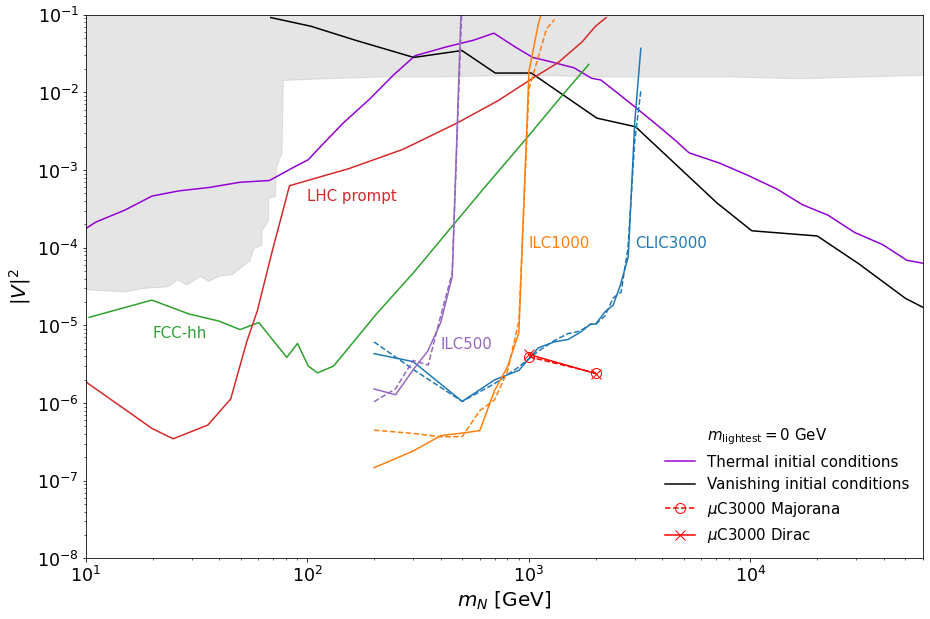

In [4]:

text_on = True


f = plt.figure(figsize=(15, 10))

ax1 = plt.subplot(111)


ax1.fill_between(df['M_1'], df['V2_1'], 1, interpolate=True, color='gray', alpha=0.2)

ax1.plot(np.NaN, np.NaN, '-', color='none', label=r"$m_{\rm lightest}=0~$GeV")
ax1.plot(df['M_2'], df['V2_2'], color='darkviolet', label="Thermal initial conditions")
ax1.plot(df['M_3'], df['V2_3'], color='black', label="Vanishing initial conditions")
        
for i in range(4, max(color_dt.keys()) + 1):
    x_name = 'M_' + str(i)
    y_name = 'V2_' + str(i)
    
    if i == 7 or i == 9 or i == 11:
        linestyle_ = '--'
    else: 
        linestyle_ = '-'
    
    ax1.plot(df[x_name], df[y_name], color=color_dt[i], linestyle=linestyle_, alpha=1)
    if i >= 4 and text_on:
        ax1.text(text_dt[i][0], text_dt[i][1], text_dt[i][2], fontsize=15, color=color_dt[i], alpha=1)
    
    
    
for tp in ['M', 'D']:
    for cm in [3]:
        x_name = 'M_our_' +tp + str(cm)
        y_name = 'V2_our_' +tp + str(cm)
        
        if tp == 'M':
            ax1.plot(df[x_name], df[y_name], marker='o', linestyle='--', markersize=10, mfc='none', color='red', label=r'$\mu$C3000 Majorana')
        elif tp == 'D':
            ax1.plot(df[x_name], df[y_name], marker='x', linestyle='-', markersize=10, color='red', label=r'$\mu$C3000 Dirac')

            
# ax1.text(1.2e3, 2e-6, r'$\mu$C3000', fontsize=15, color='red')
    
    
    


    
    
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.set_xlim([1e1, 6e4])
# ax1.set_xlim([2e2, 3e3])
ax1.set_ylim([1e-8, 1e-1])

# ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=20);
plt.xticks(fontsize=17.5)
plt.yticks(fontsize=17.5)

ax1.set_ylabel(r'$|V|^2$', fontsize=20);
ax1.set_xlabel(r'$m_N$ [GeV]', fontsize=20);

# ax1.text(1e4, 5e-7, r"$m_{\rm lightest}=0~$GeV")
plt.legend(frameon=False, loc=4, fontsize=15)